In [29]:
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
from tvDatafeed import TvDatafeed,Interval
import numpy as np

In [30]:
tv = TvDatafeed()
niftydf = tv.get_hist(symbol='AAPL', exchange='NASDAQ', interval=Interval.in_daily,n_bars=1000)

In [31]:
x = niftydf.index.values.astype('datetime64[s]')
x = [[int(i.item().year), int(i.item().day), int(i.item().month), int(i.item().hour), int(i.item().minute), int(i.item().second)] for i in x]
x = np.array(x)
y = niftydf.iloc[:,-2].values

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=120)

In [34]:
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).reshape(-1)
y_test = scaler.transform(y_test.reshape(-1, 1)).reshape(-1)

In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=120)

In [36]:
model.fit(x_train, y_train)

RandomForestRegressor(random_state=120)

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(x_test))

0.9982420414911816

In [38]:
y_pred = model.predict(x_test)

In [39]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-0.4055916  -0.43311452]
 [ 0.9221938   0.90417684]
 [ 0.49733751  0.47609986]
 [-0.69242563 -0.65742821]
 [ 1.09051385  1.06071915]
 [ 1.6557731   1.68307031]
 [ 1.15104205  1.15639638]
 [ 1.18261553  1.23545362]
 [-0.27160193 -0.29875091]
 [-0.08914928 -0.05051792]
 [-0.88627308 -0.88314561]
 [ 0.89627561  0.87161065]
 [ 0.07656884  0.05930876]
 [-1.15859495 -1.15625243]
 [ 0.51280758  0.53067631]
 [-0.86585913 -0.90083242]
 [-0.78833981 -0.78415561]
 [-0.89138934 -0.83468936]
 [ 1.20147248  1.3167568 ]
 [-1.14092611 -1.1735462 ]
 [-0.94290176 -0.94210164]
 [-0.94293377 -0.94485293]
 [-0.31933948 -0.33103636]
 [ 1.18633931  1.13685666]
 [ 1.92848689  1.91822067]
 [ 1.16227851  1.19435284]
 [-0.93364566 -0.93120881]
 [-0.59930822 -0.60981419]
 [ 1.71788694  1.75763566]
 [ 0.70688636  0.75077885]
 [-0.86127179 -0.88808668]
 [-1.03611743 -1.02890739]
 [ 0.43869366  0.4745277 ]
 [ 1.78185817  1.80637265]
 [-1.01110042 -1.00976071]
 [ 1.30421769  1.28284304]
 [-0.74371233 -0.72997221]
 

In [40]:
val = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
perct = np.apply_along_axis(lambda j: (j[0] - j[1]) * 100 / j[0], 1, val)

In [41]:
# max(perct), min(perct)
perct

array([-6.78587129e+00,  1.95370700e+00,  4.27026888e+00,  5.05432277e+00,
        2.73217040e+00, -1.64860792e+00, -4.65172504e-01, -4.46790045e+00,
       -9.99586925e+00,  4.33333425e+01,  3.52879654e-01,  2.75193922e+00,
        2.25419143e+01,  2.02186266e-01, -3.48449076e+00, -4.03914230e+00,
        5.30760229e-01,  6.36085525e+00, -9.59525257e+00, -2.85908915e+00,
        8.48569466e-02, -2.03530666e-01, -3.66283484e+00,  4.17103637e+00,
        5.32345400e-01, -2.75960794e+00,  2.61003679e-01, -1.75301545e+00,
       -2.31381476e+00, -6.20927088e+00, -3.11340627e+00,  6.95871178e-01,
       -8.16835162e+00, -1.37578187e+00,  1.32499772e-01,  1.63888680e+00,
        1.84750540e+00, -1.21001522e+00,  2.72317355e+00, -1.56030096e-01,
       -3.85512808e+00, -3.81267931e+00,  5.02969167e+00, -7.10131832e+00,
        1.98491170e-01,  7.48063727e-01,  3.88492479e+00, -1.39345769e+00,
        2.65420500e+00, -5.32487985e+00,  3.80052396e-02, -2.74701838e+00,
        6.70180809e+00, -

In [42]:
x_label = np.apply_along_axis(lambda j: str(j[0]) + '-' + str(j[1]) + '-' + str(j[2]) + ' ' + str(j[3]) + ':' + str(j[4]) + ':' + str(j[5]), 1, x_test)
x_label

array(['2020-7-1 20:0:0', '2021-1-2 20:0:0', '2020-7-10 19:0:',
       '2020-26-3 19:0:', '2021-5-10 19:0:', '2022-22-3 19:0:',
       '2021-27-9 19:0:', '2021-12-8 19:0:', '2020-4-6 19:0:0',
       '2020-23-6 19:0:', '2018-18-9 19:0:', '2020-31-12 20:0',
       '2020-16-7 19:0:', '2018-10-12 20:0', '2020-20-10 19:0',
       '2018-24-10 19:0', '2019-14-10 19:0', '2018-9-10 19:0:',
       '2021-1-9 19:0:0', '2019-1-2 20:0:0', '2019-26-7 19:0:',
       '2018-8-8 19:0:0', '2020-21-1 20:0:', '2021-12-7 19:0:',
       '2021-28-12 20:0', '2021-5-8 19:0:0', '2019-29-7 19:0:',
       '2019-9-12 20:0:', '2022-7-4 19:0:0', '2021-20-5 19:0:',
       '2018-15-10 19:0', '2018-12-6 19:0:', '2020-13-8 19:0:',
       '2022-1-4 19:0:0', '2019-4-4 19:0:0', '2021-16-11 20:0',
       '2020-25-3 19:0:', '2019-3-10 19:0:', '2018-8-10 19:0:',
       '2018-21-6 19:0:', '2022-28-3 19:0:', '2022-9-2 20:0:0',
       '2022-21-1 20:0:', '2020-6-11 20:0:', '2019-8-4 19:0:0',
       '2019-17-12 20:0', '2022-6-1 20:0

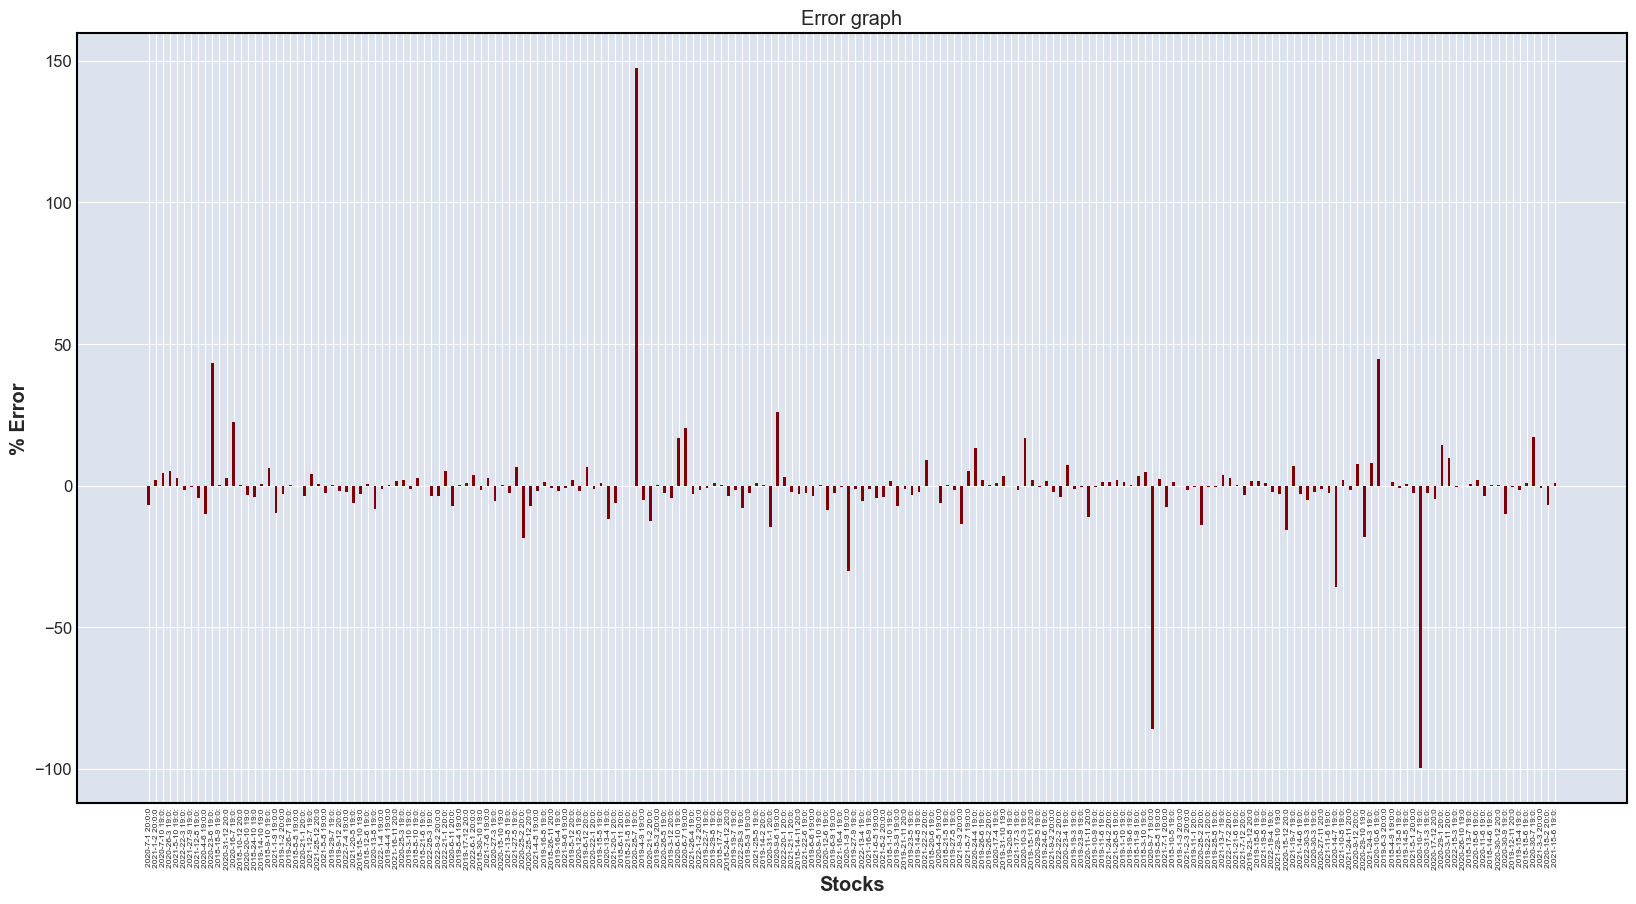

f:\tradingAlgorithms\venv\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


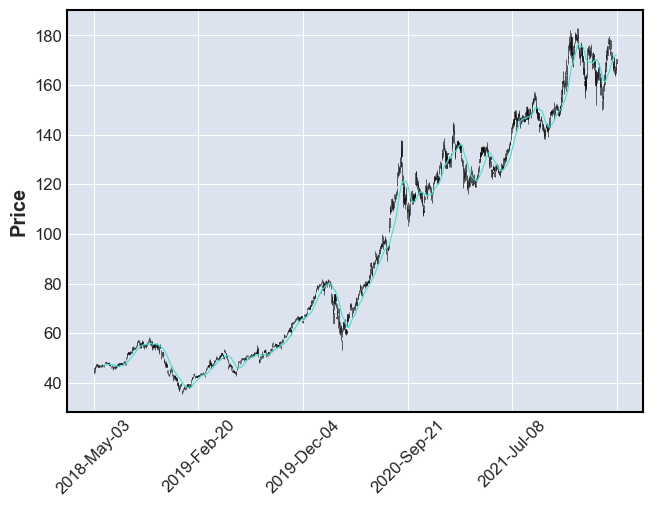

In [43]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (20, 10))
plt.bar(x_label, perct, color ='maroon',
        width = 0.4)
plt.xticks(rotation = 90, fontsize = 6)
plt.xlabel("Stocks")
plt.ylabel("% Error")
plt.title("Error graph")
plt.show()
mpf.plot(niftydf, type='candle', mav=(20))

In [44]:
# apple = tv.get_hist(symbol='AAPL', exchange='NASDAQ', interval=Interval.in_daily,n_bars=1000)

In [45]:
# x_2 = apple.index.values.astype('datetime64[s]')
# x_2 = [[int(i.item().year), int(i.item().day), int(i.item().month), int(i.item().hour), int(i.item().minute), int(i.item().second)] for i in x_2]
# x_2 = np.array(x_2)
# y_2 = apple.iloc[:,-2].values

In [46]:
# from sklearn.model_selection import train_test_split
# x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.2, random_state=120)

In [47]:
# len(y_train)

In [48]:
# scaler.fit(np.concatenate((y_train, y_train_2), axis=0).reshape(-1, 1))
# y_train_2 = scaler.fit_transform(y_train_2.reshape(-1, 1)).reshape(-1)
# y_test_2 = scaler.transform(y_test_2.reshape(-1, 1)).reshape(-1)

In [49]:
# len(np.concatenate((y_train, y_train_2), axis=0))

In [50]:
# model.fit(np.concatenate((x_train, x_train_2), axis=0), np.concatenate((y_train, y_train_2), axis=0))

In [51]:
# r2_score(y_test_2, model.predict(x_test_2))

In [52]:
# cartrade = tv.get_hist(symbol='CARTRADE', exchange='NSE', interval=Interval.in_daily,n_bars=1000)


In [53]:
# x_3 = apple.index.values.astype('datetime64[s]')
# x_3 = [[int(i.item().year), int(i.item().day), int(i.item().month), int(i.item().hour), int(i.item().minute), int(i.item().second)] for i in x_3]
# x_3 = np.array(x_3)
# y_3 = apple.iloc[:,-2].values
# from sklearn.model_selection import train_test_split
# x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3, y_3, test_size=0.2, random_state=120)
# len(y_train)
# scaler.fit(np.concatenate((y_train, y_train_2, y_train_3), axis=0).reshape(-1, 1))
# y_train_3 = scaler.fit_transform(y_train_3.reshape(-1, 1)).reshape(-1)
# y_test_3 = scaler.transform(y_test_3.reshape(-1, 1)).reshape(-1)
# # len(np.concatenate((y_train, y_train_2), axis=0))

In [54]:
# # np.concatenate((y_train, y_train_2, y_train_3), axis=0)
# np.concatenate((x_train, x_train_2, x_train_3), axis=0)

In [55]:
# model.fit(np.concatenate((x_train, x_train_2, x_train_3), axis=0), np.concatenate((y_train, y_train_2, y_train_2), axis=0))
# r2_score(y_test_3, model.predict(x_test_3))

In [56]:
# cartrade = tv.get_hist(symbol='CARTRADE', exchange='NSE', interval=Interval.in_daily,n_bars=1000)
